In [1]:
import spacy
import pandas as pd
import numpy as np
from collections import Counter
from glob import glob
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Display plots in this notebook, instead of externally. 
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8
%matplotlib inline

# The following are optional dependencies. 
# Feel free to comment these out. 
# Sent2tree uses the sent2tree.py module in this repository. 
from sent2tree import sentenceTree
import ete3 
import seaborn

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


In [2]:
# This command might take a little while. 
#nlp = spacy.load('en')
nlp = spacy.load('en_core_web_lg')

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


In [3]:
pdf_text_refined = open('witness_text_clean.txt').read()

In [4]:
# Parse the texts. These commands might take a little while. 
pdf_text = nlp(pdf_text_refined)

In [5]:
pdf_text[0]

My

In [6]:
##Exploring Named Entities

In [7]:
set([w.label_ for w in pdf_text.ents])

{'CARDINAL', 'DATE', 'GPE', 'ORG', 'PERSON', 'TIME'}

In [8]:
[ent for ent in pdf_text.ents if ent.label_ == 'GPE']

[Goma, Goma, Congo]

In [9]:
set(list([ent.string.strip() for ent in pdf_text.ents if ent.label_ == 'PERSON']))

{'Marcus BRODY'}

In [10]:
def ngrams(doc, n): 
    doc = [word for word in doc 
           if word.is_alpha # Get rid of punctuation
           if not word.string.isupper()] # Get rid of all-caps speaker headings
    return list(zip(*[doc[i:] for i in range(n)]))

In [11]:
grailGrams = set(ngrams(pdf_text, 3))
grailGrams

{(My, name, is),
 (name, is, Marcus),
 (is, Marcus, am),
 (Marcus, am, years),
 (am, years, old),
 (years, old, In),
 (old, In, late),
 (In, late, t),
 (late, t, remember),
 (t, remember, exactly),
 (remember, exactly, when),
 (exactly, when, there),
 (when, there, was),
 (there, was, a),
 (was, a, lot),
 (a, lot, of),
 (lot, of, fighting),
 (of, fighting, in),
 (fighting, in, Goma),
 (in, Goma, where),
 (Goma, where, was),
 (where, was, living),
 (was, living, with),
 (living, with, my),
 (with, my, cousins),
 (my, cousins, My),
 (cousins, My, parents),
 (My, parents, and),
 (parents, and, sisters),
 (and, sisters, were),
 (sisters, were, already),
 (were, already, killed),
 (already, killed, by),
 (killed, by, the),
 (by, the, Rebels),
 (the, Rebels, They),
 (Rebels, They, had),
 (They, had, attacked),
 (had, attacked, our),
 (attacked, our, village),
 (our, village, one),
 (village, one, night),
 (one, night, with),
 (night, with, guns),
 (with, guns, and),
 (guns, and, grenades),
 

In [12]:
for gram in grailGrams:
    if sum([word.prob for word in gram]) < -40:
        print(gram)

In [13]:
##Word Embeddings (Word Vectors)

In [14]:
pdfNouns = [word for word in pdf_text if word.pos_.startswith('N')][:150]

In [15]:
pdfNounVecs = [word.vector for word in pdfNouns]
pdfNounLabels = [word.string.strip() for word in pdfNouns]

In [16]:
pdfNounVecs[0].shape

(300,)

In [17]:
lsa = TruncatedSVD(n_components=2)
lsaOut = lsa.fit_transform(pdfNounVecs)

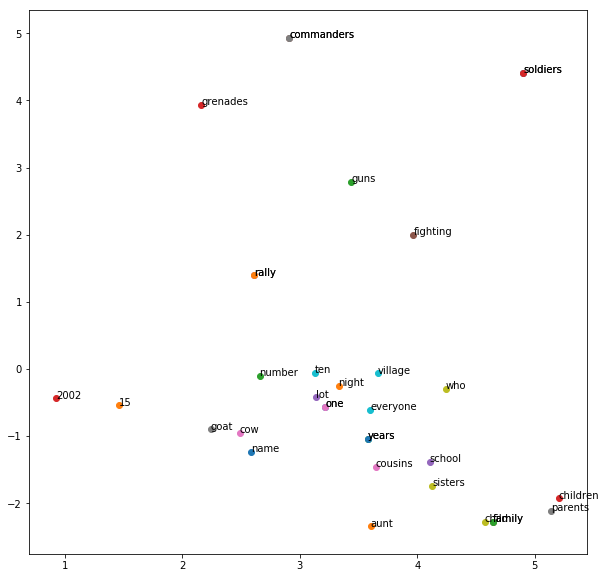

In [18]:
xs, ys = lsaOut[:,0], lsaOut[:,1]
plt.figure(figsize=[10,10])
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(pdfNounLabels[i], (xs[i], ys[i]))